The Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Parameters
P0 = 7951000000   # Initial population (7.951 billion)
K = 10000000000   # Adjusted carrying capacity to match 10.9 billion by 2100
start_year = 2021
transition_year = 2077
end_year = 5000
initial_TFR = 2.2
final_TFR = 0.0
birth_std = 0.002
death_std = 0.002
num_simulations = 100

# Forecast fertility rates
years, TFR = forecast_fertility_rate(start_year, transition_year, end_year, initial_TFR, final_TFR)

# Run deterministic model
t, P = deterministic_model(P0, K, TFR, end_year - start_year)

# Find when the population reaches the critical thresholds
mvp_threshold = 50
evo_threshold = 500
below_mvp_year = years[np.where(P < mvp_threshold)[0]]
below_evo_year = years[np.where(P < evo_threshold)[0]]
mvp_year = below_mvp_year[0] if below_mvp_year.size > 0 else None
evo_year = below_evo_year[0] if below_evo_year.size > 0 else None

# Define functions for forecasting fertility rate and population dynamics

def forecast_fertility_rate(start_year, transition_year, end_year, initial_TFR, final_TFR):
    """Generate a linearly decreasing fertility rate until a specific year, then zero."""
    years = np.linspace(start_year, end_year, num=end_year - start_year + 1)
    TFR = np.linspace(initial_TFR, final_TFR, num=int(transition_year - start_year + 1))
    TFR = np.concatenate([TFR, np.zeros(len(years) - len(TFR))])
    return years, TFR

Deterministic Model

In [16]:
def deterministic_model(P0, K, TFR, t_max):
    t = np.linspace(0, t_max, num=len(TFR))
    P = np.zeros(len(t))
    P[0] = P0

    for i in range(1, len(t)):
        birth_rate = TFR[i % len(TFR)] * 0.01
        death_rate = 0.01
        growth = birth_rate * P[i-1] * (1 - P[i-1] / K) - death_rate * P[i-1]
        P[i] = P[i-1] + growth

    return t, P

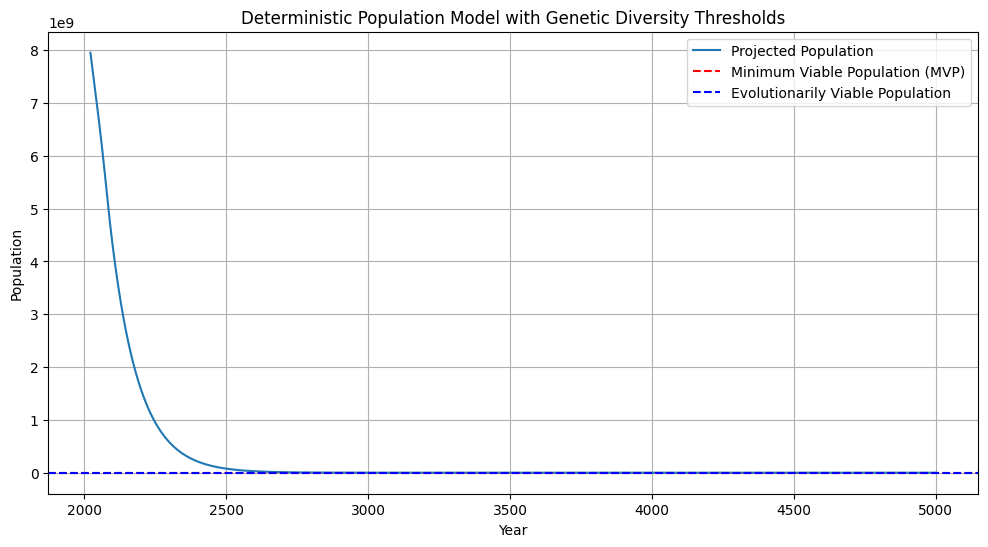

In [4]:
# Plot deterministic model
plt.figure(figsize=(12, 6))
plt.plot(years, P, label='Projected Population')
plt.axhline(y=mvp_threshold, color='r', linestyle='--', label='Minimum Viable Population (MVP)')
plt.axhline(y=evo_threshold, color='b', linestyle='--', label='Evolutionarily Viable Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Deterministic Population Model with Genetic Diversity Thresholds')
plt.legend()
plt.grid(True)
plt.show()

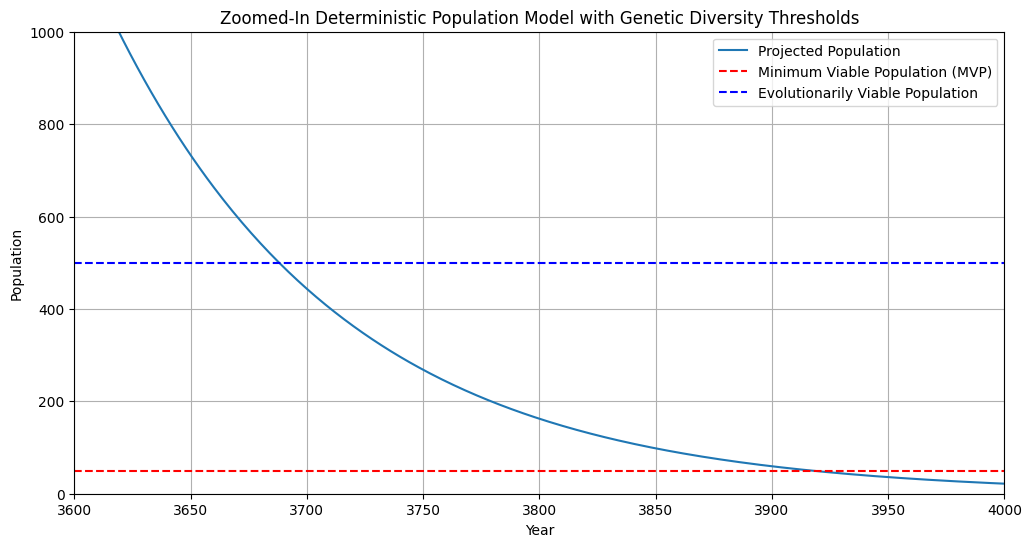

In [5]:
# Zoomed-in Plot
plt.figure(figsize=(12, 6))
plt.plot(years, P, label='Projected Population')
plt.axhline(y=mvp_threshold, color='r', linestyle='--', label='Minimum Viable Population (MVP)')
plt.axhline(y=evo_threshold, color='b', linestyle='--', label='Evolutionarily Viable Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Zoomed-In Deterministic Population Model with Genetic Diversity Thresholds')
plt.xlim(3600, 4000)  # Adjust x limits to zoom in
plt.ylim(0, 1000)    # Adjust y limits to zoom in
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Print year when thresholds are reached
if mvp_year:
    print(f"Estimated year when population reaches the Minimum Viable Population (MVP): {int(mvp_year)}")
else:
    print("Population does not reach the Minimum Viable Population (MVP) within the forecasted period.")

if evo_year:
    print(f"Estimated year when population reaches the Evolutionarily Viable Population: {int(evo_year)}")
else:
    print("Population does not reach the Evolutionarily Viable Population within the forecasted period.")

Estimated year when population reaches the Minimum Viable Population (MVP): 3918
Estimated year when population reaches the Evolutionarily Viable Population: 3689


Stochastic Model

In [7]:
def stochastic_model(P0, K, birth_std, death_std, t_max, num_simulations, TFR):
    t = np.linspace(0, t_max, num=len(TFR))
    populations = []

    for _ in range(num_simulations):
        births = np.interp(np.arange(len(t)), np.arange(len(TFR)), TFR) * 0.01
        deaths = np.random.normal(loc=0.01, scale=death_std, size=len(t))
        P = np.zeros(len(t))
        P[0] = P0

        for i in range(1, len(t)):
            growth = births[i] * P[i-1] * (1 - P[i-1] / K) - deaths[i] * P[i-1]
            P[i] = P[i-1] + growth

        populations.append(P)

    return t, np.array(populations)

In [8]:
# Run stochastic model
t, populations = stochastic_model(P0, K, birth_std, death_std, end_year - start_year, num_simulations, TFR)

# Find when the population reaches the critical thresholds in simulations
mvp_years = []
evo_years = []

for sim in populations:
    below_mvp_year = years[np.where(sim < mvp_threshold)[0]]
    below_evo_year = years[np.where(sim < evo_threshold)[0]]
    if below_mvp_year.size > 0:
        mvp_years.append(below_mvp_year[0])
    if below_evo_year.size > 0:
        evo_years.append(below_evo_year[0])

# Calculate min and max years for thresholds
mvp_min_year = np.min(mvp_years) if mvp_years else None
mvp_max_year = np.max(mvp_years) if mvp_years else None
evo_min_year = np.min(evo_years) if evo_years else None
evo_max_year = np.max(evo_years) if evo_years else None

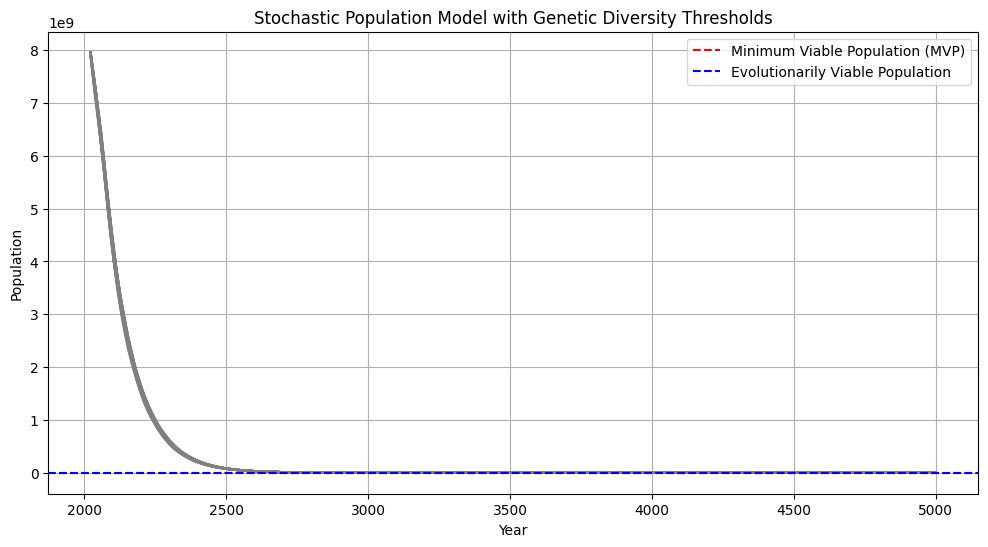

In [9]:
# Plot stochastic model
plt.figure(figsize=(12, 6))
plt.plot(years, populations.T, color='gray', alpha=0.5)
plt.axhline(y=mvp_threshold, color='r', linestyle='--', label='Minimum Viable Population (MVP)')
plt.axhline(y=evo_threshold, color='b', linestyle='--', label='Evolutionarily Viable Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Stochastic Population Model with Genetic Diversity Thresholds')
plt.legend()
plt.grid(True)
plt.show()

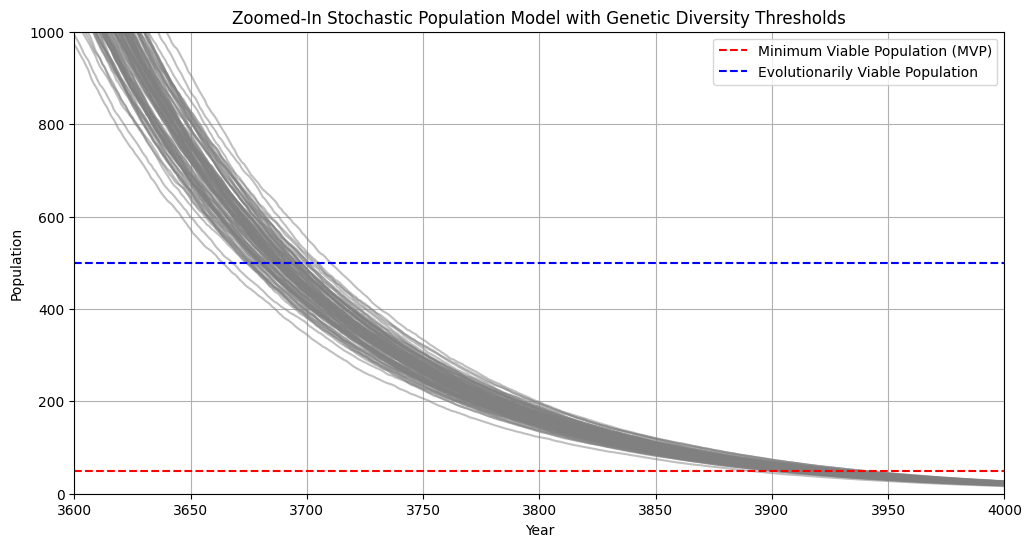

In [10]:
# Zoomed-in Plot
plt.figure(figsize=(12, 6))
plt.plot(years, populations.T, color='gray', alpha=0.5)
plt.axhline(y=mvp_threshold, color='r', linestyle='--', label='Minimum Viable Population (MVP)')
plt.axhline(y=evo_threshold, color='b', linestyle='--', label='Evolutionarily Viable Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Zoomed-In Stochastic Population Model with Genetic Diversity Thresholds')
plt.xlim(3600, 4000)  # Adjust x limits to zoom in
plt.ylim(0, 1000)    # Adjust y limits to zoom in
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Print range of years when thresholds are reached
if mvp_min_year and mvp_max_year:
    print(f"Estimated range of years when population reaches the Minimum Viable Population (MVP): {int(mvp_min_year)} to {int(mvp_max_year)}")
else:
    print("Population does not reach the Minimum Viable Population (MVP) within the forecasted period.")

if evo_min_year and evo_max_year:
    print(f"Estimated range of years when population reaches the Evolutionarily Viable Population: {int(evo_min_year)} to {int(evo_max_year)}")
else:
    print("Population does not reach the Evolutionarily Viable Population within the forecasted period.")

Estimated range of years when population reaches the Minimum Viable Population (MVP): 3890 to 3939
Estimated range of years when population reaches the Evolutionarily Viable Population: 3664 to 3711


In [12]:
# Calculate mean and standard deviation for the range of years
if mvp_years:
    mvp_mean_year = np.mean(mvp_years)
    mvp_std_dev = np.std(mvp_years)
    print(f"Mean year when population reaches the Minimum Viable Population (MVP): {mvp_mean_year:.2f}")
    print(f"Standard deviation of years when population reaches the Minimum Viable Population (MVP): {mvp_std_dev:.2f}")
else:
    print("Population does not reach the Minimum Viable Population (MVP) within the forecasted period.")

if evo_years:
    evo_mean_year = np.mean(evo_years)
    evo_std_dev = np.std(evo_years)
    print(f"Mean year when population reaches the Evolutionarily Viable Population: {evo_mean_year:.2f}")
    print(f"Standard deviation of years when population reaches the Evolutionarily Viable Population: {evo_std_dev:.2f}")
else:
    print("Population does not reach the Evolutionarily Viable Population within the forecasted period.")


Mean year when population reaches the Minimum Viable Population (MVP): 3917.41
Standard deviation of years when population reaches the Minimum Viable Population (MVP): 9.00
Mean year when population reaches the Evolutionarily Viable Population: 3688.17
Standard deviation of years when population reaches the Evolutionarily Viable Population: 8.13
